 **1. Dataset description**

I have used the Emission  by countries dataset for this experiment. The dataset is consist the polution caused by different fuel source produced by a country in span of many years.

**2. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**3.Import dataset**

In [ ]:
data = '/content/drive/MyDrive/ADS/GCB2022v27_MtCO2_flat.csv'

df = pd.read_csv(data)

**4. Exploratory data analysis**

Now, I will explore the data to gain insights about the data.

View dimensions of dataset

In [ ]:
df.shape

(63104, 11)

Preview the dataset

In [ ]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


Check for missing values

In [ ]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

**5. Descriptive statistics with describe() function**

Descriptive or summary statistics in python – pandas, can be obtained by using the describe() function. The describe() function gives us the count, mean, standard deviation(std), minimum, Q1(25%), median(50%), Q3(75%), IQR(Q3 - Q1) and maximum values.

I will demonstrate the usage of describe() function as follows.

Summary statistics of numerical columns

In [ ]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


We can see that the describe() function excludes the character columns and gives summary statistics of numeric columns only.

Summary statistics of character columns


*   The describe() function with an argument named include along with value object(include='object') gives the summary statistics of the character columns.



In [ ]:
df.describe(include=['object'])

,Country,ISO 3166-1 alpha-3
count,63104,61472
unique,232,225
top,Afghanistan,KNA
freq,272,544


Summary statistics of all the columns


*   The describe() function with include='all' gives the summary statistics of all the columns.
*   We need to add a variable named include='all' to get the summary statistics or descriptive statistics of both numeric and character columns.



In [ ]:
df.describe(include='all')

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104,61472,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
unique,232,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,KNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,272,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,NaN,NaN,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,NaN,NaN,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,NaN,NaN,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,NaN,NaN,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994


**6. Computation of measures of central tendency**


*   In this section, I will compute the measures of central tendency - mean, median and mode.
*   These statistics give us a approximate value of the middle of a numeric variable.
*   I will use the Coal variable for calculations.



Mean

In [ ]:
mean = df['Coal'].mean()

print(mean)

73.96891588612951


Median

In [ ]:
median = df['Coal'].median()

print(median)

0.2718515



Mode

In [ ]:
mode = df['Coal'].mode()

print(mode)

0    0.0
dtype: float64


Observation


*   We can see that mean > median > mode. So, the distribution of Coal is positively skewed. I will plot its distribution to confirm the same.




Plot the distribution

<Axes: xlabel='Coal', ylabel='Density'>

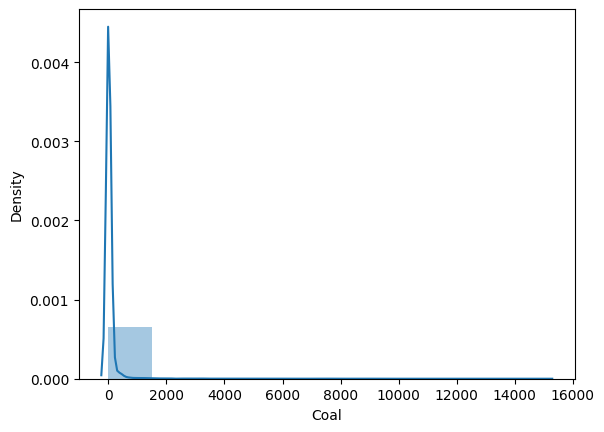

In [ ]:
data = df['Coal']

sns.distplot(data, bins=10, hist=True, label = 'Coal')

The above plot confirms that the Coal is positively skewed.



**7.  Computation of measures of dispersion or variability**


*   In this section, I will compute the measures of dispersion or variability - minimum and maximum values, range, variance, standard-deviation, IQR.
*  I will use the Oil variable for calculations.



Minimum Value

In [ ]:
df['Oil'].min()

0.0

Maximum Value

In [ ]:
df['Oil'].max()

12345.653374

Range

In [ ]:
df['Oil'].max() - df['Oil'].min()

12345.653374


Variance

In [ ]:
df['Oil'].var()

269396.8770926487

Standard deviation

In [ ]:
df['Oil'].std()

519.0345625222358

Median (Q2 or 50th percentile)

In [ ]:
Q2 = df['Oil'].quantile(0.5)

Q2

1.04424

Q3 or 75th percentile

In [ ]:
Q3 = df['Oil'].quantile(0.75)

Q3

8.339752

Q1 or 25th percentile

In [ ]:
Q1 = df['Oil'].quantile(0.25)

Q1

0.0916

Interquartile Range

In [ ]:
IQR = Q3  - Q1

IQR

8.248152000000001

Draw boxplot

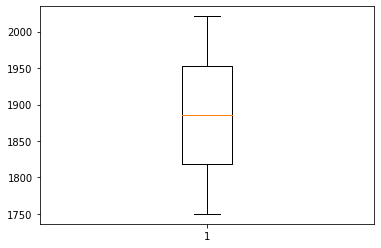

In [ ]:
plt.boxplot(df['Year'])

plt.show()

**8. Computation of measures of shape of distribution**


*   In this section, I will compute the measures of shape of distribution - skewness and kurtosis.
*   I will use the Gas variable for calculations.



Skewness

In [ ]:
df['Gas'].skew()

20.977465238146795

Kurtosis

In [ ]:
df['Gas'].kurt()

509.21712458566174